In [ ]:
pip install pandas matplotlib wordcloud openpyxl

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [13]:
def load_data(filepath):
    return pd.read_excel(filepath)

In [14]:
def plot_likert_charts(data, column):
    # Count the frequencies of responses and sort them if needed
    response_counts = data[column].value_counts(normalize=True).sort_index()

    # Create a new figure for each plot
    plt.figure(figsize=(8, 4))
    response_counts.plot(kind='bar', color='skyblue')
    plt.title(column)
    plt.ylabel('Percentage')
    plt.xlabel('Response Categories')
    plt.xticks(rotation=45)  # Rotate category labels for better readability
    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.show()

In [15]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.title(title)
    plt.axis("off")
    plt.show()

In [16]:
filepath = 'Questionnaire.xlsx'
data = load_data(filepath)
print(data.columns)

Index(['Id', 'Start time', 'Completion time', 'Email', 'Name',
       'The game agent made me feel comfortable and I will use it again.\n',
       'The game agent did not use any explicit content.\n',
       'The game agent did not generate any toxic content.\n',
       'The responses of the game agent were coherent and logical.\n',
       'The game agent's contributions were relevant to the game's storyline.\n',
       'The game agent provided accurate information and responses during gameplay.',
       'The game agent demonstrated creativity in its interactions.',
       'The scenario presented to me was immersive and the gameplay was engaging',
       'The game agent considered any diverging paths that I inputted',
       'Interacting with the agent was easy and straightforward',
       'What did you enjoy most about interacting with the game agent?\n',
       'Were there any aspects of the game agent's interaction that you found confusing or lacking? Please elaborate.\n',
       'D

In [17]:
data.head()

,Id,Start time,Completion time,Email,Name,The game agent made me feel comfortable and I will use it again.\n,The game agent did not use any explicit content.\n,The game agent did not generate any toxic content.\n,The responses of the game agent were coherent and logical.\n,The game agent's contributions were relevant to the game's storyline.\n,The game agent provided accurate information and responses during gameplay.,The game agent demonstrated creativity in its interactions.,The scenario presented to me was immersive and the gameplay was engaging,The game agent considered any diverging paths that I inputted,Interacting with the agent was easy and straightforward,What did you enjoy most about interacting with the game agent?\n,Were there any aspects of the game agent's interaction that you found confusing or lacking? Please elaborate.\n,Do you have any suggestions for improving the game agent?\n,Additional comments or suggestions\n
0,1,2024-04-08 20:11:34,2024-04-08 20:25:04,anonymous,NaN,Strongly Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,It reacted to any input that i gave it morphin...,The game agent provides choices for the paths ...,The game can be improved by the suggestions pr...,NaN
1,2,2024-04-08 21:18:50,2024-04-08 21:32:12,anonymous,NaN,Strongly Agree,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Enjoyed the diverse plotlines the model was ca...,No the agent was capable producing logical con...,Game agent was well designed and I have no sug...,Light mode was blindingly bright
2,3,2024-04-08 21:28:30,2024-04-08 21:34:29,anonymous,NaN,Strongly Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,The game incorporated whatever input I gave. I...,Nope.,Nope.,The game exceeded my expectations. The UI was ...
3,4,2024-04-08 22:46:14,2024-04-08 22:59:03,anonymous,NaN,Strongly Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Strongly agree,It was fun to watch the game agent incorporate...,It took several attempts for the game agent to...,-,NaN
4,5,2024-04-08 23:05:36,2024-04-08 23:07:44,anonymous,NaN,Strongly Agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,its unique thinking,no,reduce the length by a little,NaN


In [9]:
likert_columns = [
       'The game agent did not use any explicit content.\n',
       'The game agent did not generate any toxic content.\n',
       'The responses of the game agent were coherent and logical.\n',
       "The game agent's contributions were relevant to the game's storyline.\n",
       'The game agent provided accurate information and responses during gameplay.',
       'The game agent demonstrated creativity in its interactions.',
       'The scenario presented to me was immersive and the gameplay was engaging',
       'The game agent considered any diverging paths that I inputted',
       'Interacting with the agent was easy and straightforward',
       'The game agent made me feel comfortable and I will use it again.\n',]

In [28]:
data.columns = [col.replace('\xa0', ' ').strip() for col in data.columns]

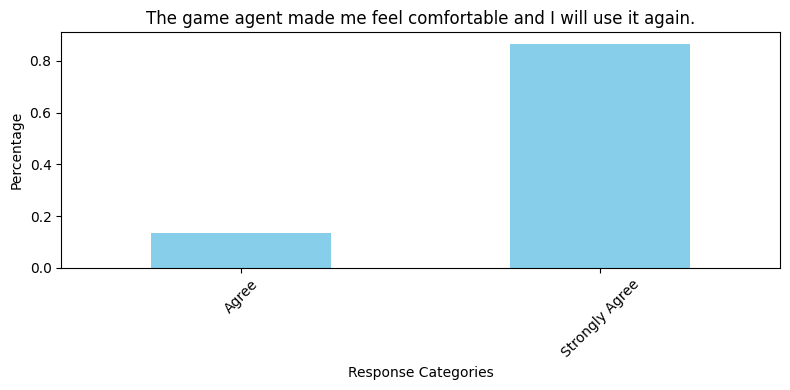

In [29]:
plot_likert_charts(data, "The game agent made me feel comfortable and I will use it again.")

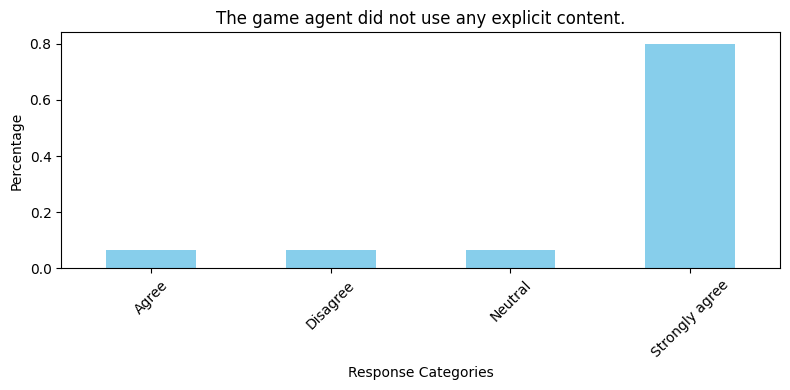

In [31]:
plot_likert_charts(data, 'The game agent did not use any explicit content.')

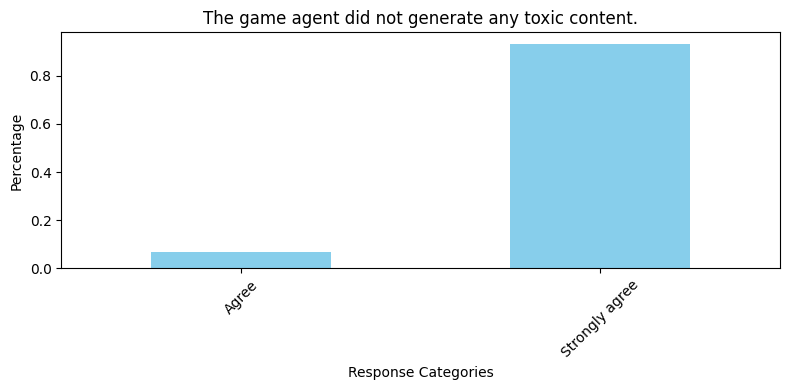

In [32]:
plot_likert_charts(data, 'The game agent did not generate any toxic content.')

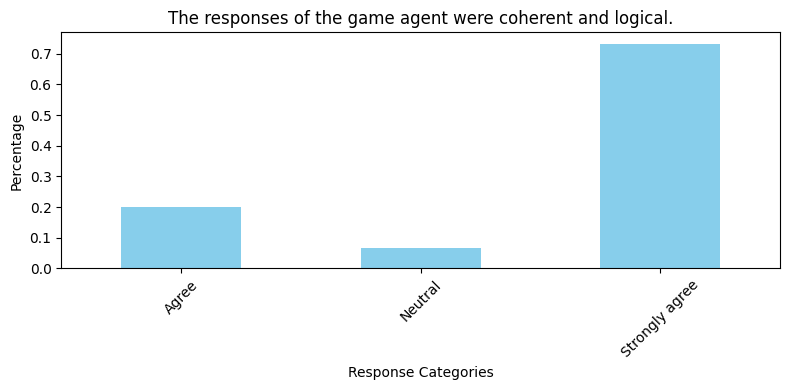

In [33]:
plot_likert_charts(data, 'The responses of the game agent were coherent and logical.')

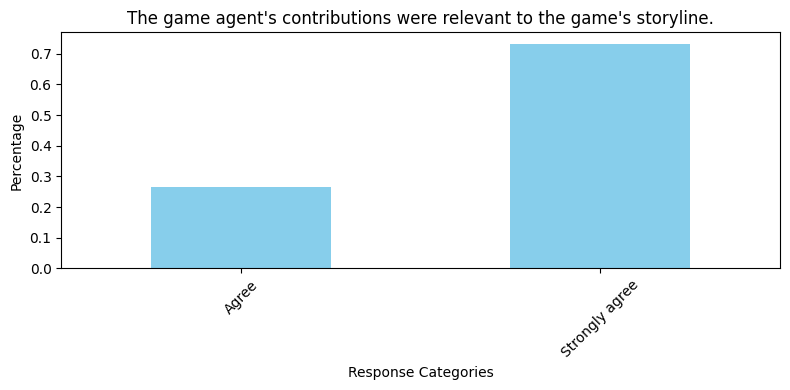

In [34]:
plot_likert_charts(data, "The game agent's contributions were relevant to the game's storyline.")

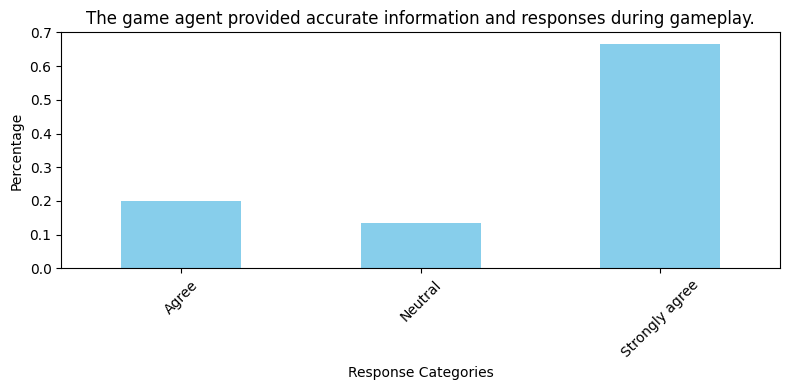

In [35]:
plot_likert_charts(data, 'The game agent provided accurate information and responses during gameplay.')

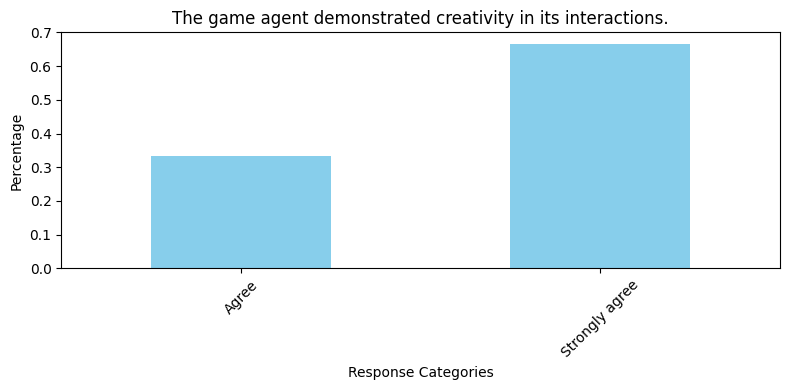

In [36]:
plot_likert_charts(data, "The game agent demonstrated creativity in its interactions.")

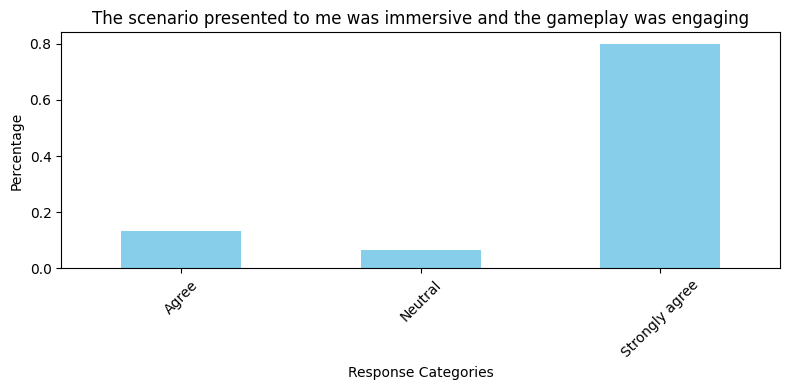

In [37]:
plot_likert_charts(data, 'The scenario presented to me was immersive and the gameplay was engaging')

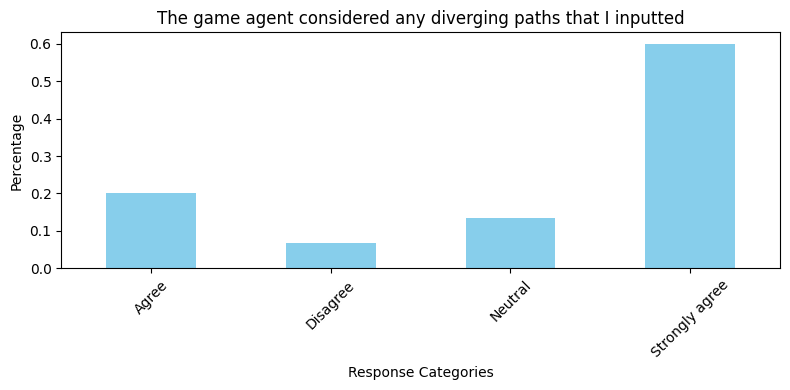

In [38]:
plot_likert_charts(data, 'The game agent considered any diverging paths that I inputted')

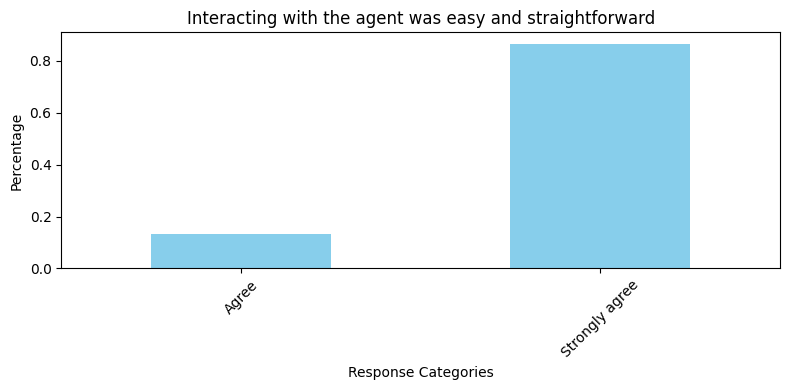

In [39]:
plot_likert_charts(data, 'Interacting with the agent was easy and straightforward')

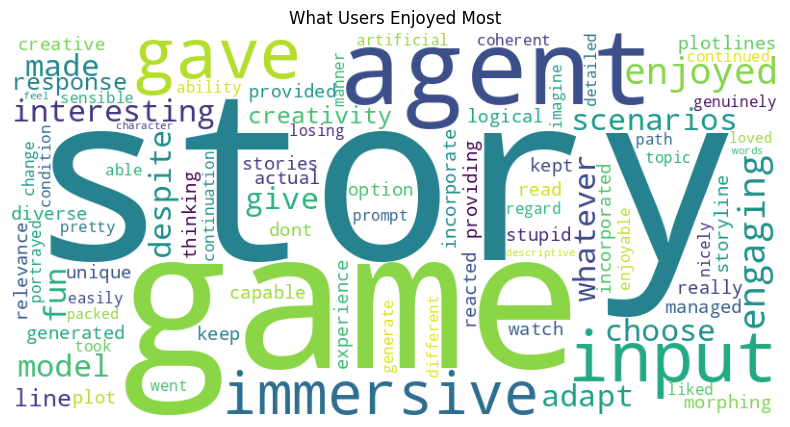

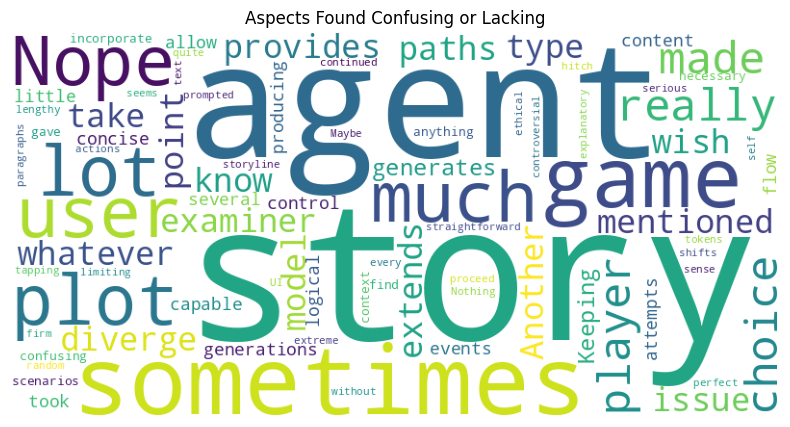

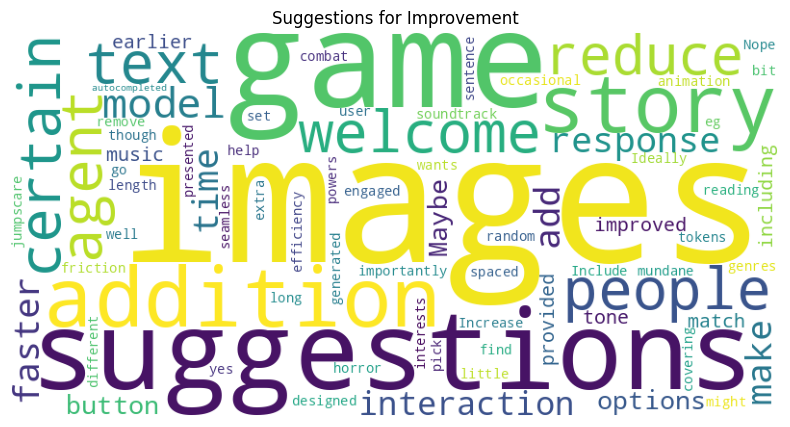

In [41]:
enjoy_text = " ".join(data["What did you enjoy most about interacting with the game agent?"].dropna())
confusing_text = " ".join(data["Were there any aspects of the game agent's interaction that you found confusing or lacking? Please elaborate."].dropna())
improvement_text = " ".join(data["Do you have any suggestions for improving the game agent?"].dropna())

generate_wordcloud(enjoy_text, "What Users Enjoyed Most")
generate_wordcloud(confusing_text, "Aspects Found Confusing or Lacking")
generate_wordcloud(improvement_text, "Suggestions for Improvement")